# Sartorious experiments data-plotting code

In [6]:
# Importing python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

# Importing files
std = '204'
folder = (r"C:\Users\admin\Documents\GitHub\viscosity_liquid_transfer_Pablo\Sartorious_experiments\Cleaned_Data")

df_cal = pd.read_csv(folder+r'/Viscosity_std_'+std+'_modified.csv')

df_cal


,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out,delay_aspirate,delay_dispense,delay_blow_out,density,time,m,%error,Transfer_Observation,Comment,iteration,time_for_1000
0,Viscosity_std_204,rLine1000,1000.0,127.130775,127.130775,False,10,10,0,0.8639,78.725538,0.758603,-12.188579,Complete Transfer,Blowout before,1,35.731832
1,Viscosity_std_204,rLine1000,500.0,127.130775,127.130775,False,10,10,0,0.8639,71.047900,0.402936,-6.717021,Complete Transfer,Blowout before,1,35.731832
2,Viscosity_std_204,rLine1000,300.0,127.130775,127.130775,False,10,10,0,0.8639,67.998543,0.238253,-8.070855,Complete Transfer,Blowout before,1,35.731832
3,Viscosity_std_204,rLine1000,1000.0,158.913469,158.913469,False,10,10,0,0.8639,75.887200,0.682425,-21.006491,Complete Transfer,Blowout before,2,32.585466
4,Viscosity_std_204,rLine1000,500.0,158.913469,158.913469,False,10,10,0,0.8639,69.869834,0.394674,-8.629705,Complete Transfer,Blowout before,2,32.585466
5,Viscosity_std_204,rLine1000,300.0,158.913469,158.913469,False,10,10,0,0.8639,67.242198,0.222603,-14.109134,Complete Transfer,Blowout before,2,32.585466
6,Viscosity_std_204,rLine1000,1000.0,12.713078,158.913469,False,10,10,0,0.8639,148.588744,0.683343,-20.900230,Complete Transfer,Blowout before,3,104.951893
7,Viscosity_std_204,rLine1000,500.0,12.713078,158.913469,False,10,10,0,0.8639,105.732822,0.375513,-13.065648,Complete Transfer,Blowout before,3,104.951893
8,Viscosity_std_204,rLine1000,300.0,12.713078,158.913469,False,10,10,0,0.8639,88.841983,0.208819,-19.427767,Complete Transfer,Blowout before,3,104.951893
9,Viscosity_std_204,rLine1000,1000.0,158.913469,12.713078,False,10,10,0,0.8639,148.284910,0.844441,-2.252405,Complete Transfer,Blowout before,4,104.951893


#### Making a scatterplot

In [ ]:
# Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Dropping NAN rows
df_cal_1000 = df_cal.where(df_cal.volume==1000).dropna(how='all')
df_cal_500 = df_cal.where(df_cal.volume==500).dropna(how='all')
df_cal_300 = df_cal.where(df_cal.volume==300).dropna(how='all')
df_cal_100 = df_cal.where(df_cal.volume==100).dropna(how='all')

# Plotting graph 1: Iteration against error
axs[0].scatter(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].scatter(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'green')
axs[0].scatter(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'blue')
axs[0].scatter(df_cal_100['iteration'],df_cal_100['%error'], marker= 'x', label = '100', c = 'grey')

# Setting graph 1 labels
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

# Plotting graph 2: Iteration against Time
axs[1].scatter(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', c = 'red')

# Setting graph 2 labels
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

#Formatting subplots
fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+'_'+'random_initialisation')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

folder = folder = (r"C:\Users\admin\Documents\GitHub\viscosity_liquid_transfer_Pablo\Sartorious_experiments\Finalised_Data")
fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_scatter.png')



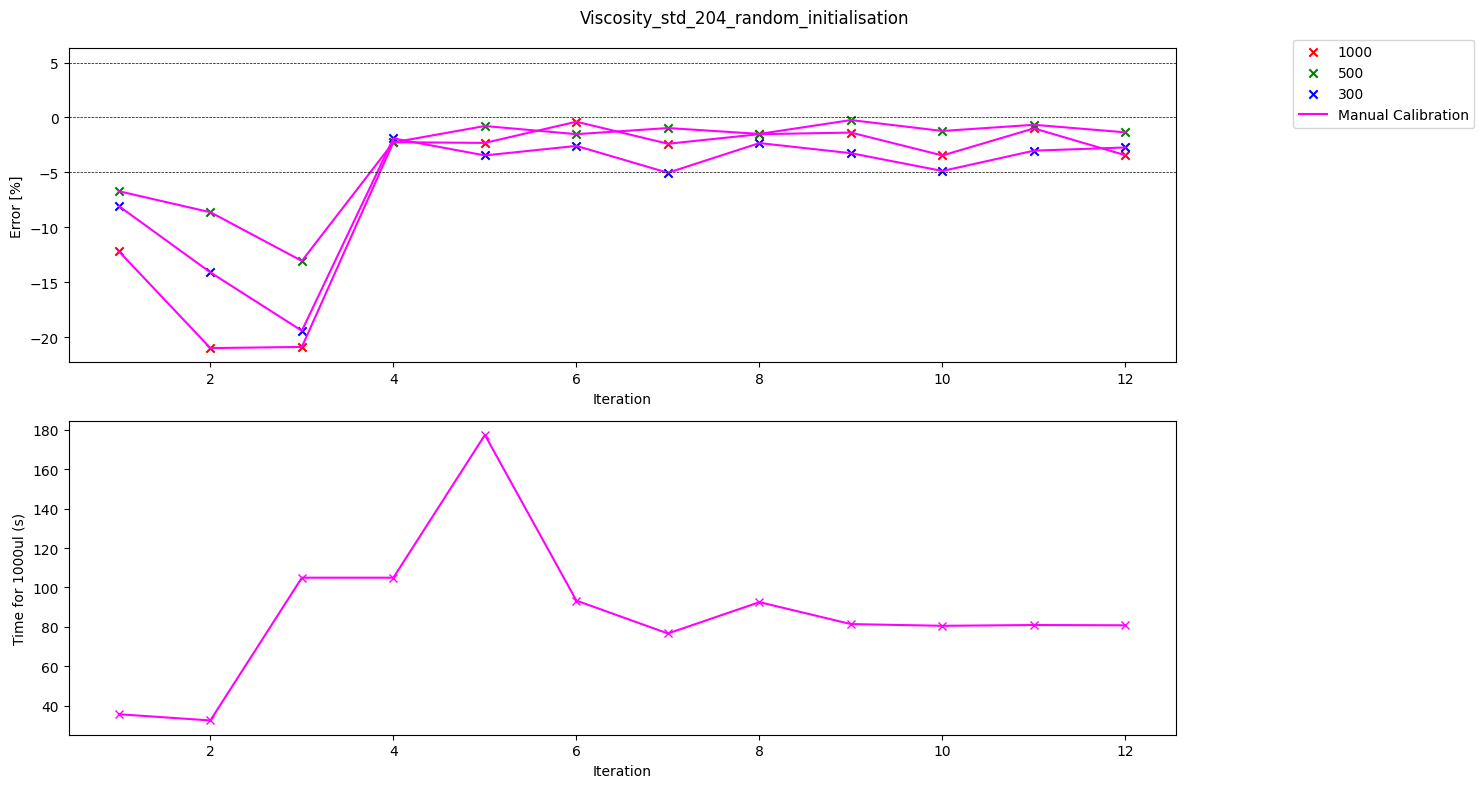

In [7]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Dropping NAN rows
df_cal_1000 = df_cal.where(df_cal.volume==1000).dropna(how='all')
df_cal_500 = df_cal.where(df_cal.volume==500).dropna(how='all')
df_cal_300 = df_cal.where(df_cal.volume==300).dropna(how='all')
df_cal_100 = df_cal.where(df_cal.volume==100).dropna(how='all')

# Plotting graph 1: Iteration against error
if len(df_cal_1000) != 0:
    axs[0].scatter(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
if len(df_cal_500) != 0:
    axs[0].scatter(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'green')
if len(df_cal_300) != 0:
    axs[0].scatter(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'blue')
if len(df_cal_100) != 0:
    axs[0].scatter(df_cal_100['iteration'],df_cal_100['%error'], marker= 'x', label = '100', c = 'grey')

if len(df_cal_1000) != 0:
    axs[0].plot(df_cal_1000['iteration'],df_cal_1000['%error'], label = 'Manual Calibration', c = 'magenta')
if len(df_cal_500) != 0:
    axs[0].plot(df_cal_500['iteration'],df_cal_500['%error'], c = 'magenta')
if len(df_cal_300) != 0:
    axs[0].plot(df_cal_300['iteration'],df_cal_300['%error'], c = 'magenta')
if len(df_cal_100) != 0:
    axs[0].plot(df_cal_100['iteration'],df_cal_100['%error'], c = 'magenta')

axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-5, ls = '--', color = 'black', linewidth=0.5)

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

axs[1].plot(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', label = 'Human Driven ', c = 'magenta')

axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+'_'+'random_initialisation')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

folder = folder = (r"C:\Users\admin\Documents\GitHub\viscosity_liquid_transfer_Pablo\Sartorious_experiments\Finalised_Data")
fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_line.png')
